<a href="https://colab.research.google.com/github/SachinSharma6174/neural_network/blob/main/MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#1. Load datasets
from sklearn.datasets import load_digits
# from sklearn.datasets import load_breast_cancer
# cancer = load_digits()
digit_data = load_digits()
X = digit_data.data
y = digit_data.target
# print(y)
# print(y)
print(X)
# data = datasets.load_covt
# print(datasets.fetch_covtype)



[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
[0 1 2 3 4 5 6 7 8 9]


<Figure size 432x288 with 0 Axes>

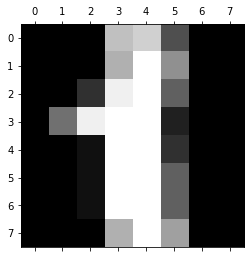

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# print(np.unique(X))
digits = load_digits()
print(np.unique(X))
print(np.unique(y))
# print(digits.DESCR)
# print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[1])
# plt.imshow(digits.images[3], cmap = plt.cm.gray_r, interpolation="nearest")
plt.show()

In [33]:
# Creating train and test split 80-20 split of train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)   

(1437, 64)
(360, 64)


In [34]:
# Standardizing the value
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_std = standard_scaler.transform(X_train)
X_test_std =standard_scaler.transform(X_test)

In [12]:
# Training Neural Network using Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier

perceptron = MLPClassifier(max_iter = 20, random_state = 1, verbose = True)
perceptron.fit(X_train_std, y_train)

print("activation func {}".format(perceptron.activation))
print("Predicted Classes {}".format(perceptron.classes_))
print("Training set loss Loss {}".format(perceptron.loss_))
print(perceptron.coefs_[0].shape)
print(perceptron.coefs_[1].shape)

Iteration 1, loss = 2.36973571
Iteration 2, loss = 1.86998516
Iteration 3, loss = 1.48691322
Iteration 4, loss = 1.19590293
Iteration 5, loss = 0.97273199
Iteration 6, loss = 0.80674542
Iteration 7, loss = 0.67616138
Iteration 8, loss = 0.57547481
Iteration 9, loss = 0.49574764
Iteration 10, loss = 0.43309775
Iteration 11, loss = 0.38139401
Iteration 12, loss = 0.34105240
Iteration 13, loss = 0.30753728
Iteration 14, loss = 0.27954816
Iteration 15, loss = 0.25590595
Iteration 16, loss = 0.23554836
Iteration 17, loss = 0.21754442
Iteration 18, loss = 0.20214219
Iteration 19, loss = 0.18768295
Iteration 20, loss = 0.17532251
activation func relu
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Training set loss Loss 0.17532251478885544
(64, 100)
(100, 10)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [24]:
#  Generic Class for Confusion Metrics plotting and Output Accuracy and activations.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from typing import cast

class ConfusionMatrixAndAccuracyMetrics():
  def __init__(self) -> None:
      pass
  def confusionMatrixAndAccuracyPlot(self ,y_test, y_predicted, activation,score):
    print(metrics.classification_report(y_test,y_predicted))
    print("Activation func {}".format(perceptron2.activation))
    print("Accuracy on Test data {}".format(score))

    mat = confusion_matrix(y_test, y_predicted)
    sns.heatmap(mat.T, square = True, annot = True , fmt = 'd', cbar = False)
    plt.xlabel('True label')
    plt.ylabel(' Predicted label ')


In [ ]:
# Round 2 MLP, introducing hidden nodes with combinations of activation function, number of neuron, and hidden layers

neuron_layer_1 = 100

neuron_layer_2 = 200


# single hidden layer + tanh
perceptron1 = MLPClassifier(activation='tanh', hidden_layer_sizes=[neuron_layer_1,])
perceptron2 = MLPClassifier(activation='tanh', hidden_layer_sizes=[neuron_layer_2,])

# double hidden layer + tanh
perceptron3 = MLPClassifier(activation='tanh', hidden_layer_sizes=[neuron_layer_1,neuron_layer_2])
perceptron4 = MLPClassifier(activation='tanh', hidden_layer_sizes=[neuron_layer_2,neuron_layer_1])


# single hidden layer + relu
perceptron5 = MLPClassifier(activation='relu', hidden_layer_sizes=[neuron_layer_2,])
perceptron6 = MLPClassifier(activation='relu', hidden_layer_sizes=[neuron_layer_1,])

# double hidden layer + relu
perceptron7 = MLPClassifier(activation='relu', hidden_layer_sizes=[neuron_layer_1,neuron_layer_2])
perceptron8 = MLPClassifier(activation='relu', hidden_layer_sizes=[neuron_layer_2,neuron_layer_1])





In [27]:
# perceptron1 Accuracy and confusion Matrix
class PerceptronPrediction():
  def __init__(self) -> None:
      pass
  def predict(self, perceptron):
    perceptron.fit(X_train_std, y_train)
    score = perceptron.score(X_test_std,y_test)
    y_predicted = perceptron.predict(X_test_std)
    cfm = ConfusionMatrixAndAccuracyMetrics()
    cfm.confusionMatrixAndAccuracyPlot(y_test, y_predicted, perceptron.activation, score)



# perceptron1.fit(X_train_std, y_train)
# score = perceptron1.score(X_test_std,y_test)
# y_predicted = perceptron1.predict(X_test_std)
# cfm = ConfusionMatrixAndAccuracyMetrics()
# cfm.confusionMatrixAndAccuracyPlot(y_test, y_predicted,perceptron1.activation, score)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        35
           2       1.00      0.97      0.99        36
           3       0.93      1.00      0.96        41
           4       1.00      0.97      0.99        38
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       1.00      0.93      0.96        29
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Activation func tanh
Accuracy on Test data 0.9777777777777777


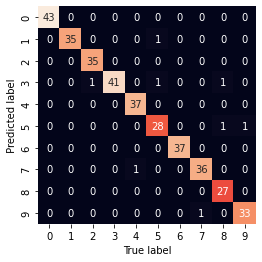

In [28]:
predictor = PerceptronPrediction()
predictor.predict(perceptron1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        35
           2       1.00      0.97      0.99        36
           3       0.95      1.00      0.98        41
           4       0.97      1.00      0.99        38
           5       0.91      0.97      0.94        30
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        37
           8       1.00      0.90      0.95        29
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Activation func tanh
Accuracy on Test data 0.9777777777777777


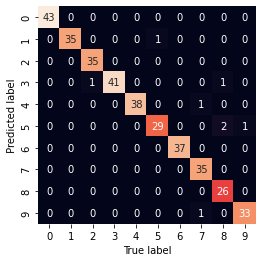

In [29]:
predictor.predict(perceptron2)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.99        38
           5       0.91      0.97      0.94        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.93      0.96        29
           9       1.00      0.97      0.99        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Activation func tanh
Accuracy on Test data 0.9833333333333333


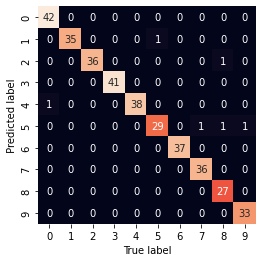

In [30]:
predictor.predict(perceptron3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       0.95      1.00      0.98        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        37
           8       1.00      0.93      0.96        29
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Activation func tanh
Accuracy on Test data 0.9833333333333333


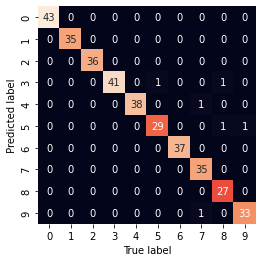

In [35]:
predictor.predict(perceptron4)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        35
           2       0.97      0.97      0.97        36
           3       0.98      1.00      0.99        41
           4       0.97      0.97      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Activation func tanh
Accuracy on Test data 0.9833333333333333


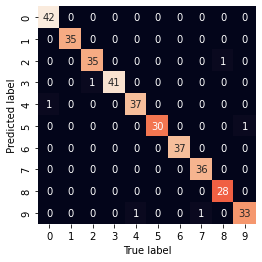

In [36]:
predictor.predict(perceptron5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      0.97      0.99        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       1.00      0.97      0.98        29
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Activation func tanh
Accuracy on Test data 0.9888888888888889


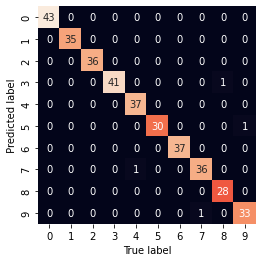

In [37]:
predictor.predict(perceptron6)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Activation func tanh
Accuracy on Test data 0.9861111111111112


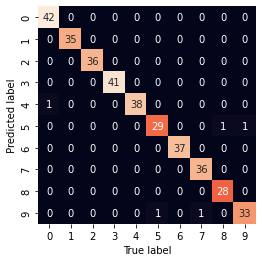

In [38]:
predictor.predict(perceptron7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      0.97      0.99        36
           3       0.98      1.00      0.99        41
           4       0.97      1.00      0.99        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       0.97      0.92      0.94        37
           8       1.00      1.00      1.00        29
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Activation func tanh
Accuracy on Test data 0.9861111111111112


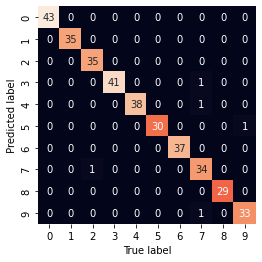

In [39]:
predictor.predict(perceptron8)

In [ ]:
# Plotting Accuracy vs Epoch
from pandas.core.common import random_state

%matplotlib inline
start_num_epoch = 10
finish_num_epoch = 100
increments = 10
pred_score = []
num_epochs = []

for epoch_count in range(start_num_epoch,finish_num_epoch,increments):
  mlp = MLPClassifier(random_state=20, max_iter=epoch_count)
  mlp.fit(X_train_std,y_train)
  score = mlp.score(X_test_std, y_test)
  pred_score.append(score)
  num_epochs.append(epoch_count)


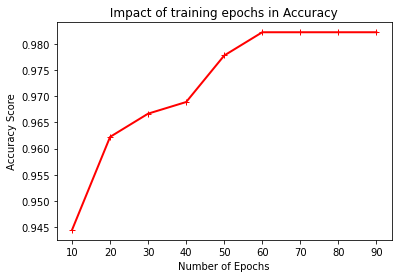

In [33]:
plt.plot(num_epochs, pred_score, "r-+", linewidth=2)
plt.xlabel('Number of Epochs')
plt.ylabel(' Accuracy Score ')
plt.title(' Impact of training epochs in Accuracy ')
plt.show()